# Predicting what sorts of people were more likely to survive?

In this notebook, we're going to go through an example of machine learning project with the goal of predicting if the passagers are going to die or not

## 1. Problem definition

* Understand the Dataset & cleanup (if required).
* Build a strong classification model to predict whether the passenger survives or not.
* Also fine-tune the hyperparameters & compare the evaluation metrics of various classification algorithms.

## 2. Data

The data is downloaded from Kaggle's Titanic dataset: https://www.kaggle.com/datasets/yasserh/titanic-dataset/data
There is only one dataset with 891 entries 

## 3. Evaluation 

We are going to evaluate with the most important classification problem evaluation metrics and try to get the best scores out of everyone of them

## 4. Features

1. Passenger ID
2. Survived: Weather Survived or not: 0 = No, 1 = Yes
3. Pclass: Ticket class: 1 = 1st, 2 = 2nd, 3 = 3rd
4. Name: Name of the Passenger
5. Sex: Gender
6. Age: Age in Years
7. SibSp: No. of siblings / spouses aboard the Titanic
8. Parch: No. of parents / children aboard the Titanic
9. Ticket: Ticket number
10. Fare: Passenger fare
11. Cabin: Cabin number
12. Embarked: Port of Embarkation:C = Cherbourg, Q = Queenstown, S = Southampton

### Import tools

In [1]:
# Import all of our tools
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn

### Load Data

In [2]:
# import the dataset
df = pd.read_csv("data/Titanic-Dataset.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
df.drop("PassengerId", axis=1, inplace = True)
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### Explore data (EDA)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 76.7+ KB


In [5]:
df.isna().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

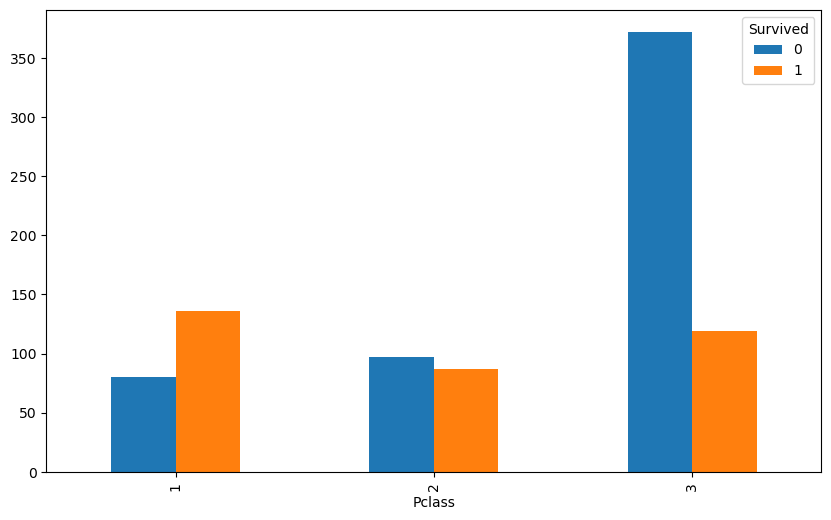

In [6]:
pd.crosstab(df.Pclass, df.Survived).plot(kind="bar", figsize=(10,6));

We can see that the first class mostly survied, the second class its almost balanced and the third class its predominantly dead

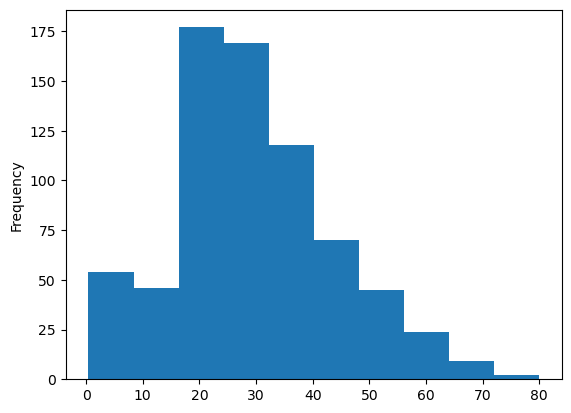

In [7]:
df.Age.plot.hist();

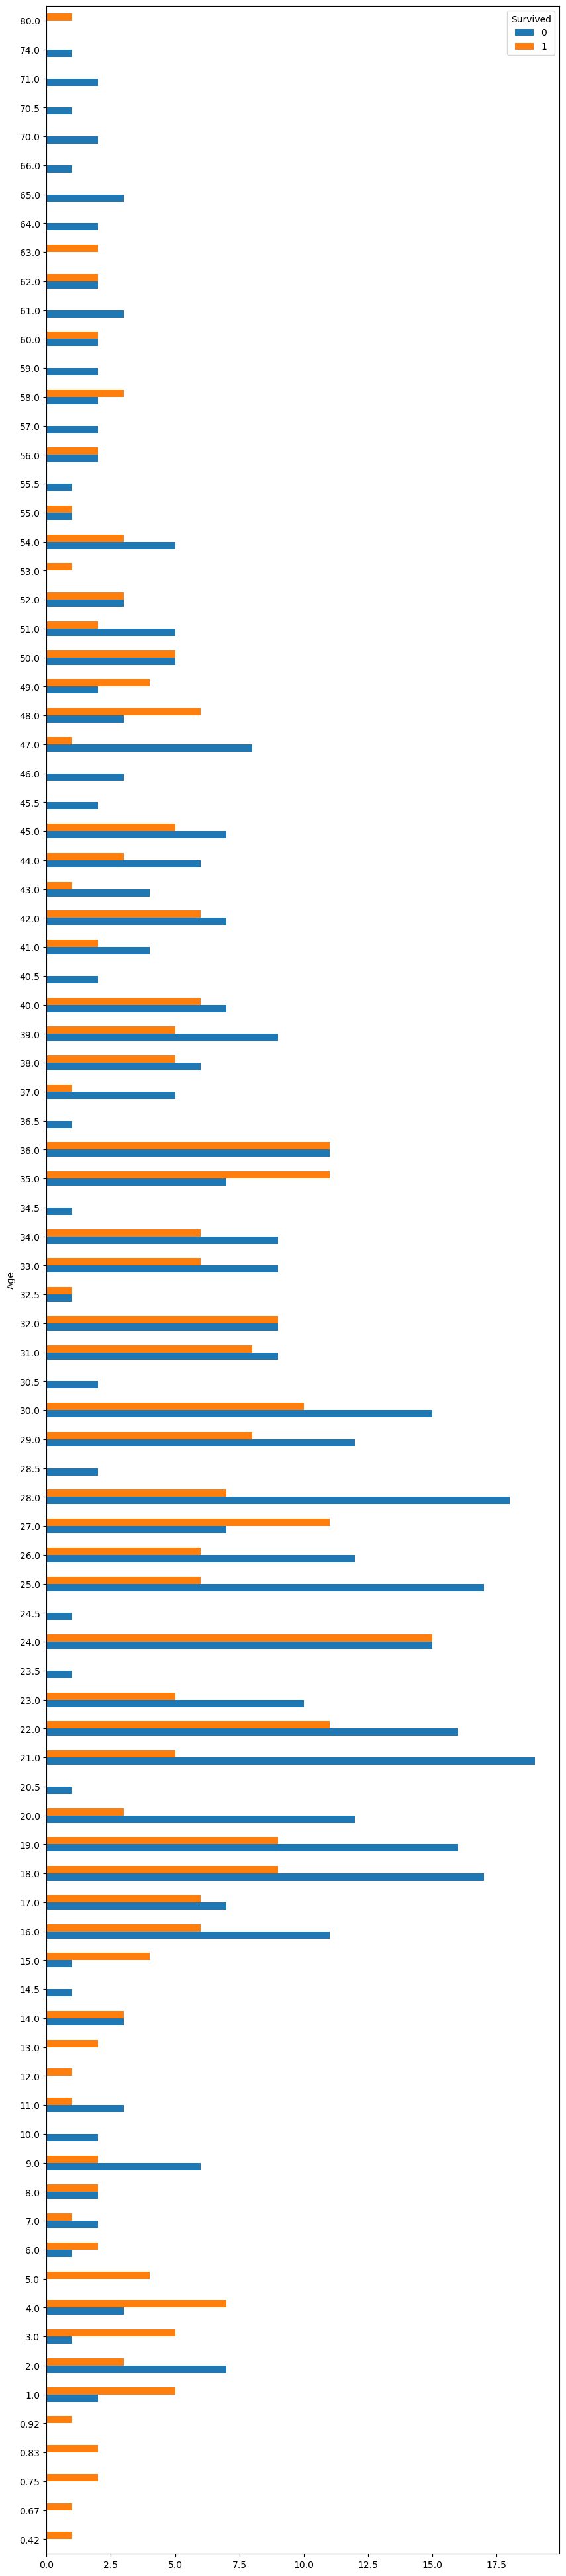

In [8]:
pd.crosstab(df.Age, df.Survived).plot(kind="barh", figsize=(10,50));

In [9]:
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


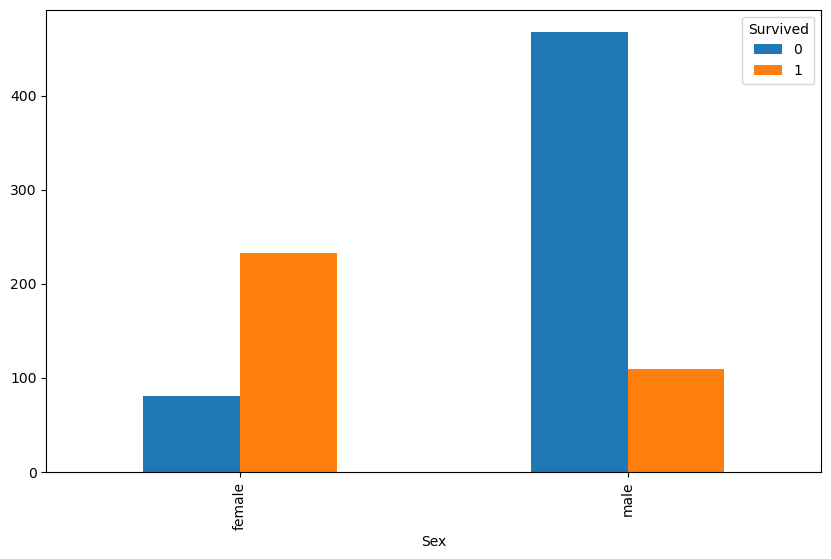

In [10]:
pd.crosstab(df.Sex, df.Survived).plot(kind="bar", figsize=(10,6));

### Making a copy of the original DataFrame

In [11]:
df.drop("Cabin", axis=1, inplace=True)

In [12]:
df_tmp = df.copy()
df_tmp.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


# 5. Modelling

We've done enough EDA but let's start to do some model-driven EDA

### Filling missing data

In [13]:
df_tmp["Embarked"].fillna("C", inplace=True)

C:\Users\epaci\AppData\Local\Temp\ipykernel_25292\3752558787.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_tmp["Embarked"].fillna("C", inplace=True)


In [14]:
df_tmp["Embarked"].isna().sum()

0

In [15]:
df_tmp["Age"].fillna(df_tmp["Age"].median(), inplace=True)
df_tmp["Age"].isna().sum()

C:\Users\epaci\AppData\Local\Temp\ipykernel_25292\3540084252.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_tmp["Age"].fillna(df_tmp["Age"].median(), inplace=True)


0

### Convert string into categories

In [16]:
# Find the columns which contains strings
for label, content in df_tmp.items():
    if pd.api.types.is_string_dtype(content):
        print(label)

Name
Sex
Ticket
Embarked


In [17]:
# This will turn all of the string value into category values
for label, content in df_tmp.items():
    if pd.api.types.is_string_dtype(content):
        df_tmp[label] = content.astype("category").cat.as_ordered()

In [18]:
df_tmp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   Survived  891 non-null    int64   
 1   Pclass    891 non-null    int64   
 2   Name      891 non-null    category
 3   Sex       891 non-null    category
 4   Age       891 non-null    float64 
 5   SibSp     891 non-null    int64   
 6   Parch     891 non-null    int64   
 7   Ticket    891 non-null    category
 8   Fare      891 non-null    float64 
 9   Embarked  891 non-null    category
dtypes: category(4), float64(2), int64(4)
memory usage: 108.1 KB


### Turning categorical variables into numbers

In [19]:
# Turn categorical variables into numbers and fill missing 
for label, content in df_tmp.items():
    if not pd.api.types.is_numeric_dtype(content):
        # Turn categories into numbers and add +1
        df_tmp[label] = pd.Categorical(content).codes + 1

In [20]:
df_tmp.head().T

,0,1,2,3,4
Survived,0.00,1.0000,1.000,1.0,0.00
Pclass,3.00,1.0000,3.000,1.0,3.00
Name,109.00,191.0000,354.000,273.0,16.00
Sex,2.00,1.0000,1.000,1.0,2.00
Age,22.00,38.0000,26.000,35.0,35.00
SibSp,1.00,1.0000,0.000,1.0,0.00
Parch,0.00,0.0000,0.000,0.0,0.00
Ticket,524.00,597.0000,670.000,50.0,473.00
Fare,7.25,71.2833,7.925,53.1,8.05
Embarked,3.00,1.0000,3.000,3.0,3.00


In [21]:
# Split into train and test sets
np.random.seed(42)
from sklearn.model_selection import train_test_split
X = df_tmp.drop("Survived", axis = 1)
y = df_tmp.Survived
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)
X_train.shape, X_test.shape

((712, 9), (179, 9))

### Create models dictionary and scoring dictionary

In [39]:
# Models from sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

# Model evaluation
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay, RocCurveDisplay
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import roc_auc_score, roc_curve


In [23]:
dict_model ={
    "LogReg": LogisticRegression(max_iter = 1500),
    "KNN": KNeighborsClassifier(),
    "RandomForest": RandomForestClassifier()
}

dict_score = {}

def fit_and_score(dict_model, dict_score, X_train, X_test, y_train, y_test):
    """
    Fits the given models in the dict_model dictionary and scores them returning the results in the dict_score dictionary
    """
    for name, model in dict_model.items():
        model.fit(X_train, y_train)
        dict_score[name] = model.score(X_test, y_test)
    return dict_score

dict_score = fit_and_score(dict_model, dict_score, X_train, X_test, y_train, y_test)
dict_score

{'LogReg': 0.8212290502793296,
 'KNN': 0.6480446927374302,
 'RandomForest': 0.8268156424581006}

### Tuning hyperparameters with RandomizedSearchCV

In [24]:
# Tuning Logistic Regression
param_grid = [    
    {"C": np.logspace(-4, 4, 20),
    "solver": ["liblinear"],
    'max_iter' : [500,1000, 1500, 2500, 5000]
    }
]

# Tune LogisticRegression
np.random.seed(42)

# Setup random hyperparameter search
rs_log =  RandomizedSearchCV(LogisticRegression(),
                       param_distributions=param_grid,
                       cv=5,
                       n_iter = 100,
                       verbose=True)
# Fit random hyperparameter search model
rs_log.fit(X_train, y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=100,
                   param_distributions=[{'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                         'max_iter': [500, 1000, 1500, 2500,
                                                      5000],
                                         'solver': ['liblinear']}],
                   verbose=True)

In [25]:
rs_log.best_params_

{'solver': 'liblinear', 'max_iter': 500, 'C': 1.623776739188721}

In [26]:
rs_log.score(X_test,y_test)

0.8044692737430168

It got worse than the baseline model so lets try the Random Forest

In [27]:
# Tuning Random Forest
rf_grid = {
    "n_estimators": np.arange(10, 1000, 50),
    "max_depth": [None, 3, 5, 10],
    "min_samples_split": np.arange(2, 20, 2),
    "min_samples_leaf": np.arange(1, 20, 2)
}

# Tune LogisticRegression
np.random.seed(42)

# Setup random hyperparameter search
rs_rf =  RandomizedSearchCV(RandomForestClassifier(),
                       param_distributions=rf_grid,
                       cv=5,
                       n_iter =100,
                       verbose=True)
# Fit random hyperparameter search model
rs_rf.fit(X_train, y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=100,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([ 10,  60, 110, 160, 210, 260, 310, 360, 410, 460, 510, 560, 610,
       660, 710, 760, 810, 860, 910, 960])},
                   verbose=True)

In [28]:
rs_rf.best_params_

{'n_estimators': 910,
 'min_samples_split': 6,
 'min_samples_leaf': 1,
 'max_depth': 10}

In [29]:
rs_rf.score(X_test, y_test)

0.8212290502793296

After hyperparameter tuning I didn't got better results, i will finally try the LinearSVC classifier and after that i will score every model

### LinearSVC

In [31]:
from sklearn.svm import LinearSVC
clf = LinearSVC(random_state=42)
clf.fit(X_train, y_train)
clf.score(X_test,y_test)

0.7877094972067039

### Hyperparameter tuning for LinearSVC with RandomizedSearchCV

In [32]:
param_grid = {
    "C": np.logspace(-4, 4, 20),
    "max_iter": [1000, 1500, 2000, 5000]
}
rs_svc = RandomizedSearchCV(clf,
                            param_distributions=param_grid,
                            n_iter=80,
                            cv=5,
                            random_state=42,
                            n_jobs=-1,
                            verbose=True)
rs_svc.fit(X_train, y_train)

Fitting 5 folds for each of 80 candidates, totalling 400 fits


RandomizedSearchCV(cv=5, estimator=LinearSVC(random_state=42), n_iter=80,
                   n_jobs=-1,
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'max_iter': [1000, 1500, 2000, 5000]},
                   random_state=42, verbose=True)

In [33]:
rs_svc.best_params_

{'max_iter': 1000, 'C': 1.623776739188721}

In [34]:
rs_svc.score(X_test,y_test)

0.7877094972067039

## Model Evaluation

### 1. Logistic Regression

In [35]:
# Classification report
print(classification_report(y_test, rs_log.predict(X_test)))

              precision    recall  f1-score   support

           0       0.81      0.88      0.84       105
           1       0.80      0.70      0.75        74

    accuracy                           0.80       179
   macro avg       0.80      0.79      0.79       179
weighted avg       0.80      0.80      0.80       179



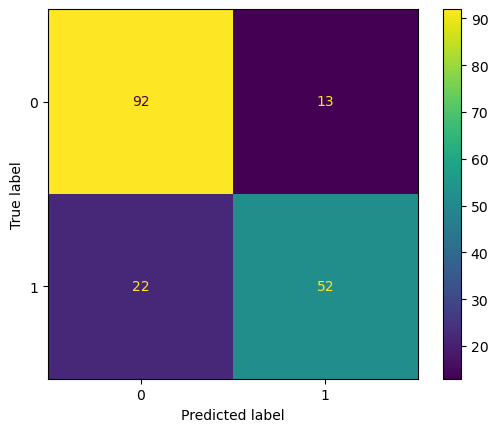

In [38]:
# Confusion Matrix
ConfusionMatrixDisplay.from_estimator(rs_log,X_test,y_test);

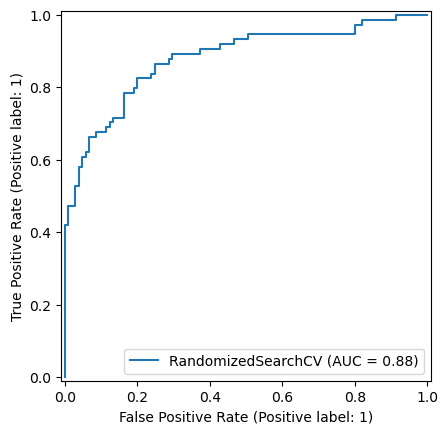

In [40]:
# ROC curve
RocCurveDisplay.from_estimator(rs_log, X_test, y_test);

### 2. RandomForestClassifier

In [41]:
# Classification report
print(classification_report(y_test, rs_rf.predict(X_test)))

              precision    recall  f1-score   support

           0       0.82      0.90      0.85       105
           1       0.83      0.72      0.77        74

    accuracy                           0.82       179
   macro avg       0.82      0.81      0.81       179
weighted avg       0.82      0.82      0.82       179



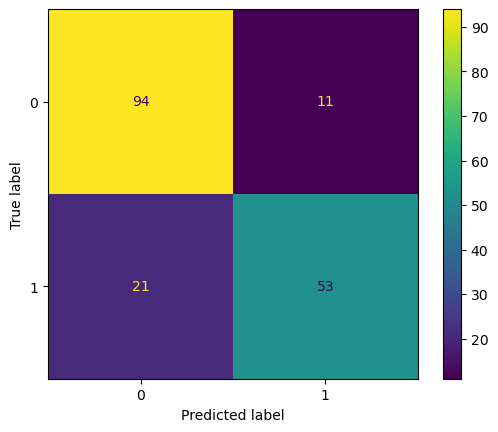

In [42]:
# Confusion Matrix
ConfusionMatrixDisplay.from_estimator(rs_rf,X_test,y_test);

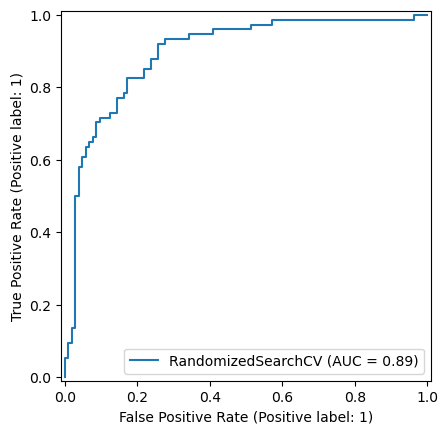

In [43]:
# ROC curve
RocCurveDisplay.from_estimator(rs_rf, X_test, y_test);